In [33]:
#pip install --upgrade langchain langgraph langsmith langchain_groq langchain_community httpx


In [19]:
groq_api_key = "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"

In [20]:

from langchain_groq import ChatGroq


In [21]:
llm = ChatGroq(groq_api_key = groq_api_key, model_name = "Gemma2-9b-it")

In [22]:

from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph,START,END 

In [23]:
class State(TypedDict):
    messages:Annotated[list,add_messages] 
    
graph_builder=StateGraph(State)

In [24]:
graph_builder


In [25]:
def chatbot(state:State):
    return{"messages":llm.invoke(state['messages'])}

In [26]:
graph_builder.add_node('chatbot',chatbot)

In [27]:
graph_builder

In [28]:

graph_builder.add_edge(START, 'chatbot')
graph_builder.add_edge('chatbot', END)

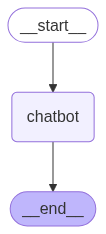

In [29]:
graph_builder.compile()

In [30]:

graph = graph_builder.compile()

In [32]:
while True:
    user_input=input("user:")
    if user_input.lower() in ['quit','q']:
        print('Good Bye, thank you using LangGrpah Framework create by Akash')
        break 
    for event in graph.stream({'messages':('user', user_input)}):
        print(event.values())
        for value in event.values():
            print(value['messages'])
            print('Assistant:',value['messages'].content)

dict_values([{'messages': AIMessage(content="## Generative AI Job Marketing in 2025: A Crystal Ball Look\n\nThe world of job marketing in 2025 will be drastically different thanks to generative AI.  Here's a glimpse into how this technology will reshape the landscape:\n\n**1. Hyper-Personalized Candidate Experiences:**\n\n* **AI-Powered Resume Screening:**  Forget generic keyword matching. AI will analyze resumes for skills, personality traits, and even cultural fit, delivering a personalized shortlist to recruiters.\n* **Dynamic Job Descriptions:**  Job descriptions will adapt to individual candidates based on their profile and interests, highlighting relevant aspects and showcasing company culture in a compelling way. \n* **AI-Generated Interview Prep:**  Imagine personalized mock interviews and feedback, powered by AI, helping candidates ace their interviews.\n\n**2. Streamlined Recruitment Processes:**\n\n* **Automated Candidate Sourcing:**  AI will scour the web, social media, and